# Import Libraries

In [187]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import cv2

#  Define Paths and Parameters

In [105]:
data_dir = r'C:\Users\ranji\Downloads\Data Analysis\Brain_Tumor_Dataset'
output_dir = r"C:\Users\ranji\Downloads\Data Analysis\predicted_images"
os.makedirs(output_dir, exist_ok=True)

img_height, img_width = 180, 180
batch_size = 32

In [175]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 1440 files belonging to 6 classes.
Using 1152 files for training.
Found 1440 files belonging to 6 classes.
Using 288 files for validation.


#  Define class names

In [177]:
class_names = train_ds.class_names
print("Class names:", class_names) 

Class names: ['glioma', 'meningioma', 'no', 'notumor', 'pituitary', 'yes']


In [121]:
from tensorflow.keras import layers, models

model = models.Sequential([
    tf.keras.Input(shape=(img_height, img_width, 3)),   # ✅ Recommended way
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)])


# Compile and Train the model 

In [127]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 204ms/step - accuracy: 0.4756 - loss: 1.3467 - val_accuracy: 0.6910 - val_loss: 0.7964
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.7470 - loss: 0.6869 - val_accuracy: 0.7639 - val_loss: 0.5773
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.8463 - loss: 0.4246 - val_accuracy: 0.7778 - val_loss: 0.6133
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - accuracy: 0.8801 - loss: 0.3029 - val_accuracy: 0.7951 - val_loss: 0.6230
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.9176 - loss: 0.1998 - val_accuracy: 0.8229 - val_loss: 0.5219
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.9690 - loss: 0.1065 - val_accuracy: 0.7812 - val_loss: 0.7562
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.9893 - loss: 0.0612 - val_accuracy: 0.8125 - val_loss: 0.7784
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.9937 - loss: 0.0323 - val_accuracy: 0

# Plot Accuracy and Loss

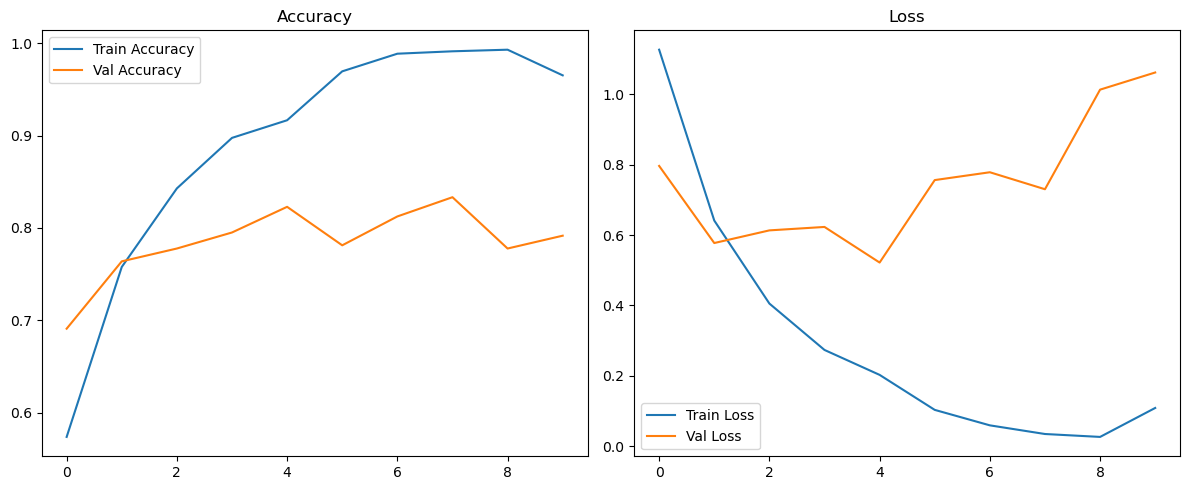

In [128]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(), plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(), plt.title("Loss")

plt.tight_layout()
plt.show()


#  Plot accuracy & loss

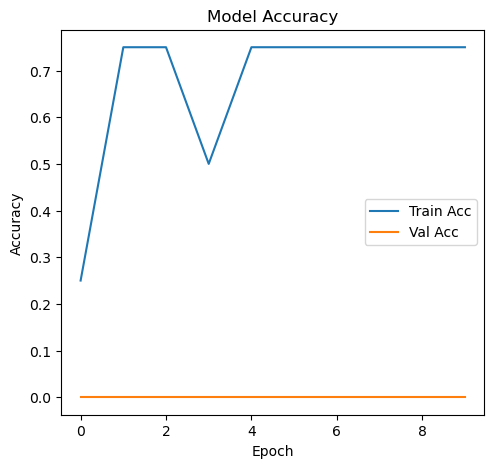

In [43]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Predicted Imges

In [131]:
def predict_and_save(image_path, index):
    img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) / 255.0

    prediction = model.predict(img_array)
    score = tf.nn.softmax(prediction[0])
    class_id = np.argmax(score)
    label = class_names[class_id]
    confidence = 100 * np.max(score)

# Class names 

In [137]:
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']  

# Path to a sample image

image_path = r"C:\Users\ranji\Downloads\Data Analysis\Predicted_Images\Tumor_1.jpg"

# Load and preprocess the image

In [199]:
img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Predict

In [201]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
predicted_index = np.argmax(score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [203]:
label = class_names[predicted_index]
confidence = 100 * np.max(score)

# Print prediction
print(f"This image most likely belongs to '{label}' with a {confidence:.2f}% confidence.")

This image most likely belongs to 'notumor' with a 93.26% confidence.


# Show Image with label

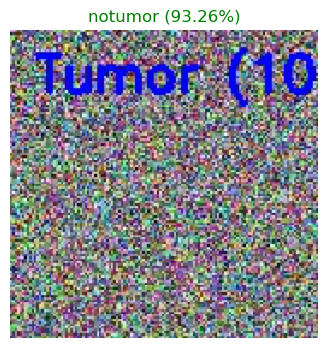

In [207]:
plt.figure(figsize=(5,4))
plt.imshow(img)
plt.title(f"{label} ({confidence:.2f}%)", fontsize=12, color='green')
plt.axis('off')
plt.show()